# Rachel Tjarksen EDA 
EDA Tasks for Rachel Tjarksen

You have been provided with two abridged datasets from FiveThirtyEight’s COVID-19 tracker. The datasets contain a list of opinion surveys fielded in the United States.  
- Dataset1 has opinion polls on the Trump administration’s handling of the coronavirus pandemic.  
- Dataset2 has opinion polls measuring respondents’ concerns, related either to the economy or infection from COVID-19.  

## Imports

In [427]:
# Add imports here
import numpy as np
import pandas
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from prophet import Prophet


## Data Extraction

In [428]:
# Data Extraction Code from the csv files
concern_data = pandas.read_csv("covid_conern.csv")
approval_data = pandas.read_csv("covid_approval.csv")

## Task 1 (Data Preprocessing)

Your task is to familiarise yourself with the datasets, perform any necessary cleaning, and combine them into one dataset.   

Before combining the datasets, here are a few things to keep in mind:  
1. Since we are reporting aggregate statistics, we need to be able to weigh the responses from each poll, to generate a weighted average. This means that we should disregard polls that do not report sample sizes or report missing values in the response options. By response options we mean the variables that capture responses to the opinion polls.  
2. For the purpose of this exercise, let us assume that our previous data indicates that a survey that has lower than 200 responses will be statistically underpowered, so please report results only for eligible studies.  
3. Please ensure that the final dataset includes indicator variables that clearly mark which of the two original datasets the row originated from.

In [429]:
# Preprocessing for Dataset 1
concern_results = concern_data[concern_data['sample_size'] >= 200].dropna()

In [430]:
# Preprocessing for Dataset 2
approval_results = approval_data[approval_data['sample_size'] >= 200].dropna()

## Task 2 (Simple Data Representation)

Following the completion of Task 1, please do the following subtasks:  
1. A summary table to display the amount of approval polls and concern polls conducted by each pollster.    
2. Aggregated proportions of respondents approving of Donald Trump’s performance, delineated by whether the poll was asked to Democrats, Republicans or Independents.    
3. Aggregated proportions of respondents who are very worried or somewhat worried about the economy.  
4. Aggregated proportions of respondents who are very worried or somewhat worried about the infection from the coronavirus.  

In [431]:
# Code for Task 2.1
# new york times has 4 polls
frequency_approval = approval_results.groupby("pollster")[["text"]].count()
frequency_concern = concern_results.groupby("pollster")[["text"]].count()
frequency_concern


,text
pollster,
ABC,2
AP-NORC,1
Change Research,5
Civiqs,4
Emerson College Polling Society,1
Greenberg Quinlan Rosner,1
Harris Poll,2
Hart Research Associates,5
Ipsos (online),36


In [432]:
# Code for Task 2.2
rep_agg = np.average(approval_results.groupby("party").get_group("R")[["approve"]], weights=approval_results.groupby("party").get_group("R")[["sample_size"]])
dem_agg = np.average(approval_results.groupby("party").get_group("D")[["approve"]], weights=approval_results.groupby("party").get_group("D")[["sample_size"]])
ind_agg = np.average(approval_results.groupby("party").get_group("I")[["approve"]], weights=approval_results.groupby("party").get_group("I")[["sample_size"]])
dem_agg

7.629547748636139

In [433]:
econ_very_agg = np.average(concern_results.groupby("subject").get_group("concern-economy")[["very"]], weights=concern_results.groupby("subject").get_group("concern-economy")[["sample_size"]])
econ_somewhat_agg = np.average(concern_results.groupby("subject").get_group("concern-economy")[["somewhat"]], weights=concern_results.groupby("subject").get_group("concern-economy")[["sample_size"]])


In [434]:
infected_very_agg = np.average(concern_results.groupby("subject").get_group("concern-infected")[["very"]], weights=concern_results.groupby("subject").get_group("concern-infected")[["sample_size"]])
infected_somewhat_agg = np.average(concern_results.groupby("subject").get_group("concern-infected")[["somewhat"]], weights=concern_results.groupby("subject").get_group("concern-infected")[["sample_size"]])

## Task 3 (Graphical Analysis)

Using a plotting library of your choice, plot the graphs that depict the following:  
  - **Change in Approval Rating**: line graphs of the change in approval rating over time, seperated by different parties.  
  - **Change in Economic Concern**: line graphs of the change in level of economic concern over time, seperated by levels of concern.  
  - **Change in Covid-19 Concern**: line graphs of the change in level of Covid-19 concern over time, seperated by levels of concern.   
  - **Aggregate Approval Rating**: A histogram of the weighted-average (aggregated) approval rating by party.  

In [435]:
rep_approval_x = approval_results.groupby("party").get_group("R")["start_date"]
rep_approval_y = approval_results.groupby("party").get_group("R")["approve"]
dem_approval_x = approval_results.groupby("party").get_group("D")["start_date"]
dem_approval_y = approval_results.groupby("party").get_group("D")["approve"]
ind_approval_x = approval_results.groupby("party").get_group("I")["start_date"]
ind_approval_y = approval_results.groupby("party").get_group("I")["approve"]

fig = go.Figure()
fig.add_trace(go.Scatter(x=rep_approval_x, y=rep_approval_y, mode='markers', name='republicans'))
fig.add_trace(go.Scatter(x=dem_approval_x, y=dem_approval_y, mode='markers', name='democrats'))
fig.add_trace(go.Scatter(x=ind_approval_x, y=ind_approval_y, mode='markers', name='independant'))

In [436]:
econ_approval_x = concern_results.groupby("subject").get_group("concern-economy")["start_date"]
econ_approval_y = concern_results.groupby("subject").get_group("concern-economy")[["very", "somewhat", "not_very", "not_at_all"]]
fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=econ_approval_x, y=econ_approval_y["very"], mode='markers', name='very'))
fig2.add_trace(go.Scatter(x=econ_approval_x, y=econ_approval_y["somewhat"], mode='markers', name='somewhat'))
fig2.add_trace(go.Scatter(x=econ_approval_x, y=econ_approval_y["not_very"], mode='markers', name='not very'))
fig2.add_trace(go.Scatter(x=econ_approval_x, y=econ_approval_y["not_at_all"], mode='markers', name='not at all'))

In [437]:
covid_approval_x = concern_results.groupby("subject").get_group("concern-infected")["start_date"]
covid_approval_y = concern_results.groupby("subject").get_group("concern-infected")[["very", "somewhat", "not_very", "not_at_all"]]
fig3 = go.Figure()
fig3.add_trace(go.Scatter(x=covid_approval_x, y=covid_approval_y["very"], mode='markers', name='very'))
fig3.add_trace(go.Scatter(x=covid_approval_x, y=covid_approval_y["somewhat"], mode='markers', name='somewhat'))
fig3.add_trace(go.Scatter(x=covid_approval_x, y=covid_approval_y["not_very"], mode='markers', name='not very'))
fig3.add_trace(go.Scatter(x=covid_approval_x, y=covid_approval_y["not_at_all"], mode='markers', name='not at all'))

## Task 4 (Data Analysis)

Using Scikit-Learn train models that can do the following following tasks:  
  - **Approval Rating**: Train a model that can take a date and party affiliation to predict what the approval rating would be.  
  - **Covid and Economic Concern**: Train a model that can predict the concern breakdown using a given time of poll. 
  - **Party Affiliation**: Given different samples of polling data, train a model that can predict whether a group of people with those preferences are democratic, republican xor independent.  
 

### Approval Rating by party prediction

17:48:22 - cmdstanpy - INFO - Chain [1] start processing
17:48:22 - cmdstanpy - INFO - Chain [1] done processing


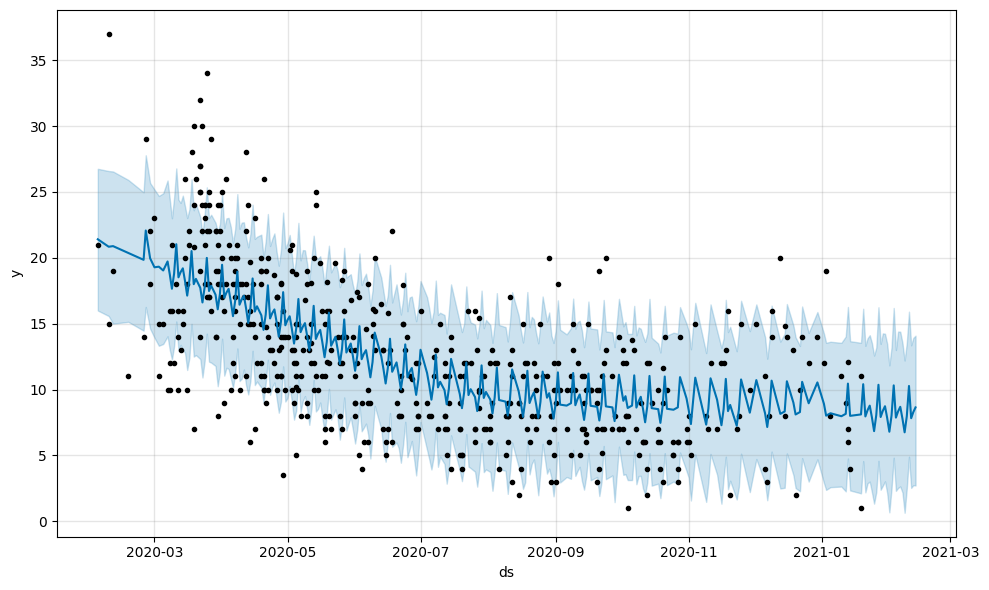

In [438]:
df_democrats = approval_data.groupby("party").get_group("D")
ds  = df_democrats["end_date"].to_list()
y = df_democrats["approve"].to_list()

df_democrats = pandas.DataFrame(list(zip(ds,y)), columns=["ds","y"])
df_democrats["ds"] = pandas.to_datetime(df_democrats["ds"])

#prediction using prophet
model = Prophet()
model.fit(df_democrats)

# create a future data frame 
future = model.make_future_dataframe(periods=25)
forecast = model.predict(future)

# display the most critical output columns from the forecast
forecast[['ds','yhat','yhat_lower','yhat_upper']].head()

# plot
fig = model.plot(forecast)

17:48:23 - cmdstanpy - INFO - Chain [1] start processing
17:48:23 - cmdstanpy - INFO - Chain [1] done processing


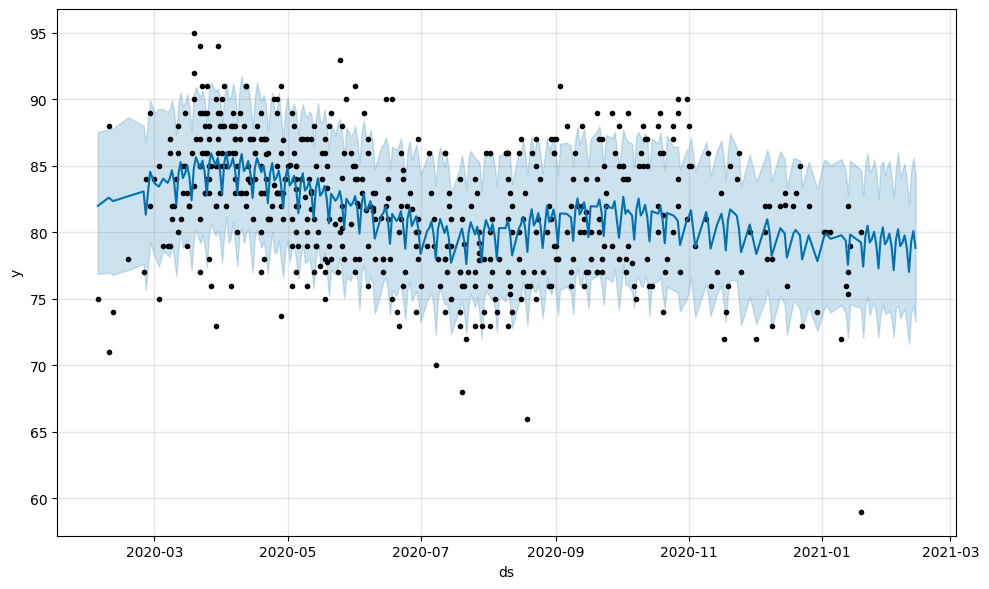

In [439]:
df_republicans = approval_data.groupby("party").get_group("R")
ds  = df_republicans["end_date"].to_list()
y = df_republicans["approve"].to_list()

df_republicans = pandas.DataFrame(list(zip(ds,y)), columns=["ds","y"])
df_republicans["ds"] = pandas.to_datetime(df_republicans["ds"])

#prediction using prophet
model = Prophet()
model.fit(df_republicans)

# create a future data frame 
future = model.make_future_dataframe(periods=25)
forecast = model.predict(future)

# display the most critical output columns from the forecast
forecast[['ds','yhat','yhat_lower','yhat_upper']].head()

# plot
fig = model.plot(forecast)

17:48:24 - cmdstanpy - INFO - Chain [1] start processing
17:48:24 - cmdstanpy - INFO - Chain [1] done processing


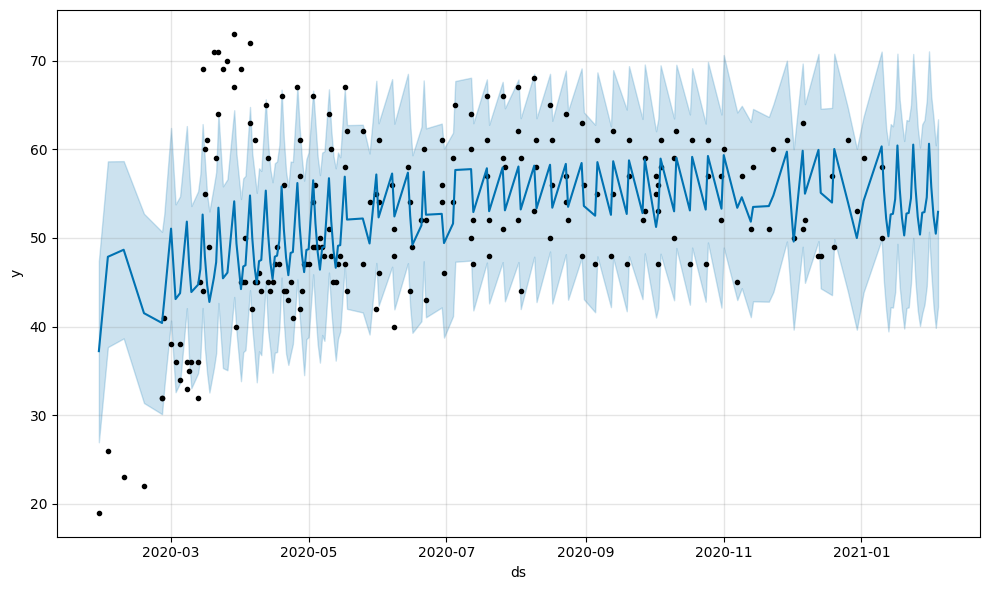

In [440]:
df_econ = concern_data.groupby("subject").get_group("concern-economy")
ds  = df_econ["end_date"].to_list()
y = df_econ["very"].to_list()

df_econ = pandas.DataFrame(list(zip(ds,y)), columns=["ds","y"])
df_econ["ds"] = pandas.to_datetime(df_econ["ds"])

#prediction using prophet
model = Prophet()
model.fit(df_econ)

# create a future data frame 
future = model.make_future_dataframe(periods=25)
forecast = model.predict(future)

# display the most critical output columns from the forecast
forecast[['ds','yhat','yhat_lower','yhat_upper']].head()

# plot
fig = model.plot(forecast)

17:48:24 - cmdstanpy - INFO - Chain [1] start processing
17:48:24 - cmdstanpy - INFO - Chain [1] done processing


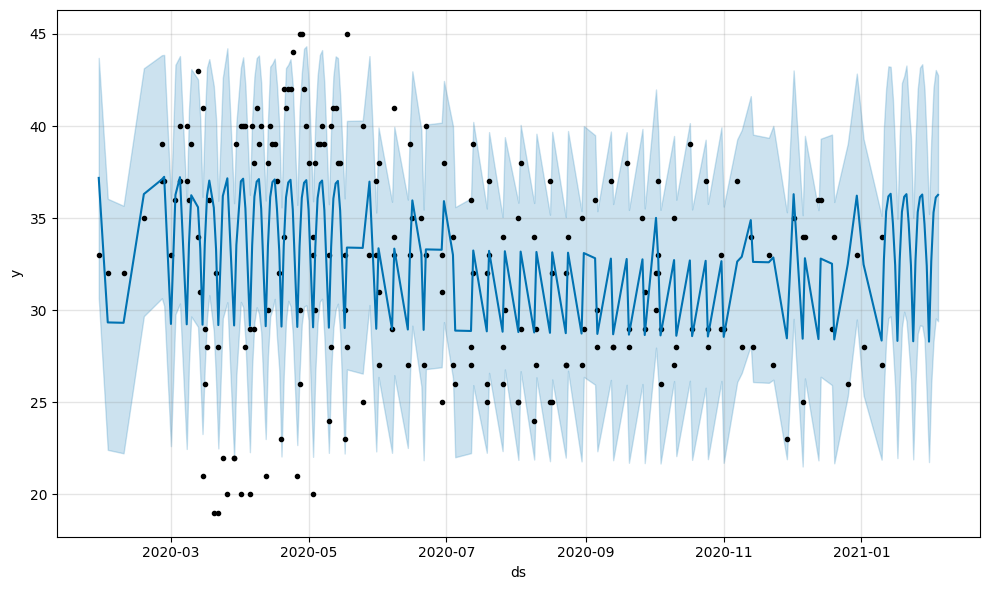

In [441]:
df_econ = concern_data.groupby("subject").get_group("concern-economy")
ds  = df_econ["end_date"].to_list()
y = df_econ["somewhat"].to_list()

df_econ = pandas.DataFrame(list(zip(ds,y)), columns=["ds","y"])
df_econ["ds"] = pandas.to_datetime(df_econ["ds"])

#prediction using prophet
model = Prophet()
model.fit(df_econ)

# create a future data frame 
future = model.make_future_dataframe(periods=25)
forecast = model.predict(future)

# display the most critical output columns from the forecast
forecast[['ds','yhat','yhat_lower','yhat_upper']].head()

# plot
fig = model.plot(forecast)

17:48:25 - cmdstanpy - INFO - Chain [1] start processing
17:48:25 - cmdstanpy - INFO - Chain [1] done processing


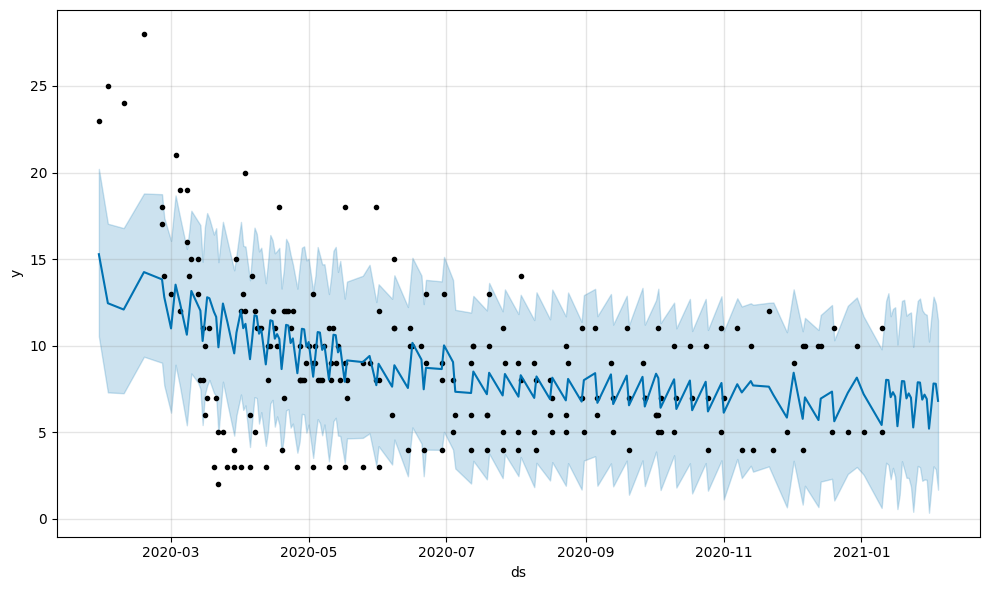

In [442]:
df_econ = concern_data.groupby("subject").get_group("concern-economy")
ds  = df_econ["end_date"].to_list()
y = df_econ["not_very"].to_list()

df_econ = pandas.DataFrame(list(zip(ds,y)), columns=["ds","y"])
df_econ["ds"] = pandas.to_datetime(df_econ["ds"])

#prediction using prophet
model = Prophet()
model.fit(df_econ)

# create a future data frame 
future = model.make_future_dataframe(periods=25)
forecast = model.predict(future)

# display the most critical output columns from the forecast
forecast[['ds','yhat','yhat_lower','yhat_upper']].head()

# plot
fig = model.plot(forecast)

17:48:26 - cmdstanpy - INFO - Chain [1] start processing
17:48:26 - cmdstanpy - INFO - Chain [1] done processing


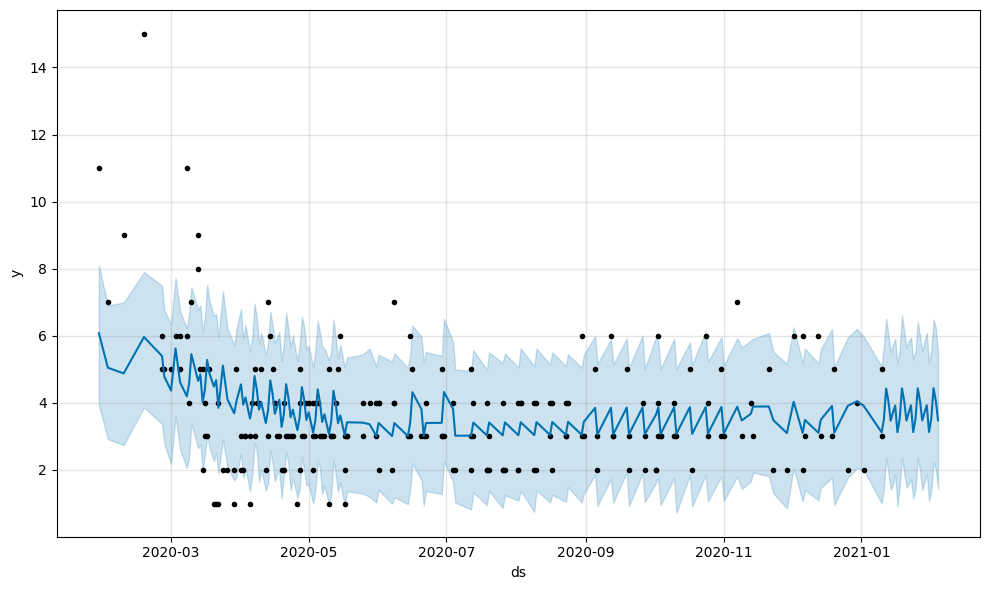

In [443]:
df_econ = concern_data.groupby("subject").get_group("concern-economy")
ds  = df_econ["end_date"].to_list()
y = df_econ["not_at_all"].to_list()

df_econ = pandas.DataFrame(list(zip(ds,y)), columns=["ds","y"])
df_econ["ds"] = pandas.to_datetime(df_econ["ds"])

#prediction using prophet
model = Prophet()
model.fit(df_econ)

# create a future data frame 
future = model.make_future_dataframe(periods=25)
forecast = model.predict(future)

# display the most critical output columns from the forecast
forecast[['ds','yhat','yhat_lower','yhat_upper']].head()

# plot
fig = model.plot(forecast)

In [467]:
x = approval_results[["approve", "disapprove"]].dropna().to_numpy()
y = approval_results["party"].to_numpy().reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

log_regr = LogisticRegression()
log_regr.fit(x_train,y_train.ravel())
log_regr.score(x_test,y_test)

/Users/racheltj/anaconda3/envs/data_science_training/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



0.8494208494208494

## Task 5 (Extra Task)